In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

In [2]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
# Converting 3d xtrain and xtest to 4d, by including channel depth

In [7]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [9]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
X_train

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [14]:
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [15]:
X_train /=255
X_test /=255

In [17]:
X_train.shape

(60000, 28, 28, 1)

In [18]:
model= Sequential()
model.add (Conv2D(28, kernel_size=(3,3), input_shape= (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

C:\anaconda3\envs\AI\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 28)          │             280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 28)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4732)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         605,824 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 607,394 (2.32 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

model = Sequential([
    Input(shape=(28, 28, 1)),  # ✅ Set input shape here
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')])

In [19]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam', metrics= ['accuracy'])

In [23]:
history= model.fit(X_train,y_train,epochs=10,batch_size=100, validation_data=(X_test,y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.8653 - loss: 0.4587 - val_accuracy: 0.9698 - val_loss: 0.0994
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9694 - loss: 0.1048 - val_accuracy: 0.9776 - val_loss: 0.0687
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9786 - loss: 0.0694 - val_accuracy: 0.9819 - val_loss: 0.0545
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9844 - loss: 0.0505 - val_accuracy: 0.9843 - val_loss: 0.0464
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9873 - loss: 0.0417 - val_accuracy: 0.9819 - val_loss: 0.0539
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 14s 23ms/step - accuracy: 0.9889 - loss: 0.0337 - val_accuracy: 0.9846 - val_loss: 0.0495
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.9909 - loss: 0.0283 - val_accuracy: 0.9835 - val_loss: 0.0498
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9926 - loss: 0.0218 - 

In [24]:
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9812 - loss: 0.0576


[0.04981430619955063, 0.9847000241279602]

In [25]:
y_predict= model.predict(X_test)
y_predict
# this is in probabilities which resembles the format of one hot encoding

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


array([[9.3982763e-08, 3.9006185e-09, 1.8493329e-05, ..., 9.9997938e-01,
        7.6596223e-09, 2.3552742e-08],
       [1.0842268e-08, 4.4537720e-07, 9.9999952e-01, ..., 1.2218826e-16,
        7.2730923e-12, 8.8298395e-18],
       [1.4332868e-07, 9.9998379e-01, 4.1713215e-06, ..., 2.0302582e-06,
        5.6630138e-06, 6.5670108e-10],
       ...,
       [4.1862436e-17, 2.5506642e-11, 1.9788684e-16, ..., 2.5080984e-08,
        1.5896555e-09, 1.2271852e-08],
       [8.3717599e-14, 1.3248437e-12, 2.0157694e-15, ..., 3.6255998e-12,
        2.9624198e-05, 4.6512529e-12],
       [4.1100831e-10, 1.9033778e-13, 9.2421022e-09, ..., 6.0474910e-17,
        9.4726928e-11, 1.0165768e-16]], dtype=float32)

In [26]:
y_predict.shape

(10000, 10)

In [30]:
import numpy as np
y_predicts= np.argmax(y_predict,axis=1)
y_predicts

array([7, 2, 1, ..., 4, 5, 6])

In [31]:
y_predicts.shape

(10000,)

In [32]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [34]:
#EVALUATION METRICS
#CONFUSION MATRIX FOR DIGIT MNIST
#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
con_mat=confusion_matrix(y_test,y_predicts)
con_mat

array([[ 967,    0,    2,    0,    1,    2,    3,    1,    4,    0],
       [   0, 1120,    1,    2,    0,    0,    4,    1,    7,    0],
       [   1,    0, 1013,    2,    2,    0,    2,    7,    5,    0],
       [   0,    0,    3,  995,    0,    3,    0,    3,    4,    2],
       [   0,    0,    2,    0,  971,    0,    2,    0,    0,    7],
       [   1,    0,    0,    7,    0,  879,    1,    0,    4,    0],
       [   2,    1,    1,    0,    1,    5,  945,    0,    3,    0],
       [   2,    1,    9,    0,    0,    0,    0, 1011,    2,    3],
       [   2,    0,    0,    1,    2,    0,    0,    1,  967,    1],
       [   2,    1,    1,    3,    8,    2,    0,    4,    9,  979]])

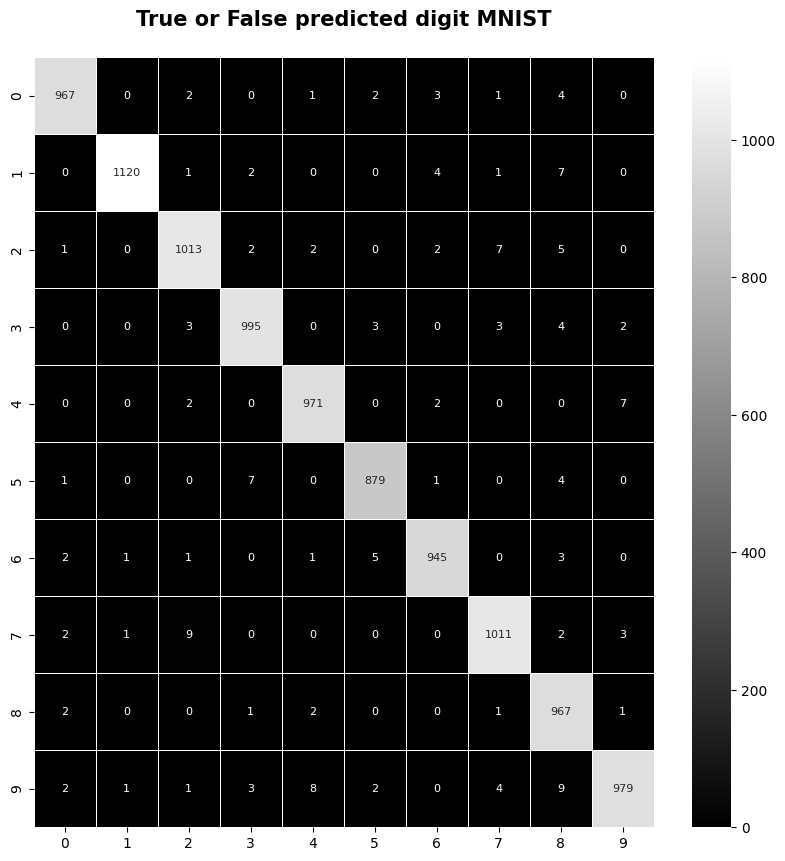

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size':8},linewidth=0.5,cmap='grey',fmt='d')
plt.title('True or False predicted digit MNIST\n', fontweight='bold',fontsize=15) #\n leaves a line below and starts the next line of code
plt.show()

In [38]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [39]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

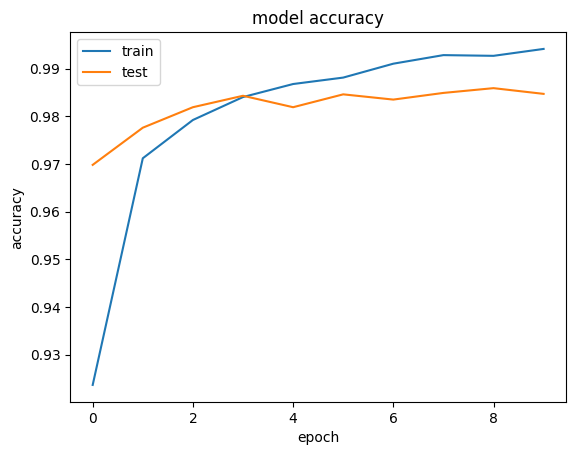

In [40]:
# ACCURACY PLOTS OF TRAIN SET AND VALIDATION SET in each epoc
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

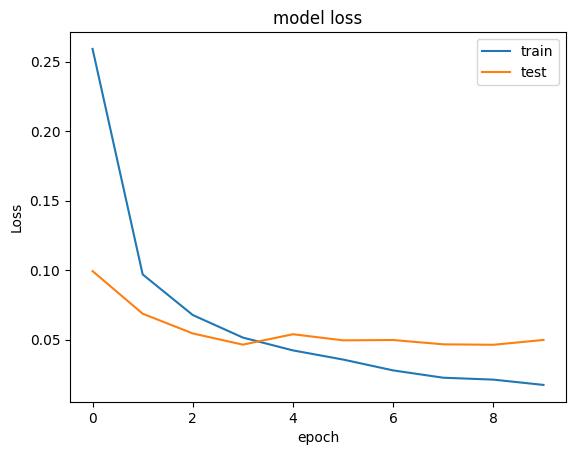

In [41]:
# LOSS PLOTS OF TRAIN SET AND VALIDATION SET in each epoc
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'])
plt.show()

In [42]:
# Prediction for single input
y_predict_single= model.predict(X_test[[2]])
y_predict_single

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[1.4332882e-07, 9.9998379e-01, 4.1713097e-06, 5.9886820e-09,
        2.5605955e-06, 8.5342670e-08, 1.5163778e-06, 2.0302582e-06,
        5.6630247e-06, 6.5670108e-10]], dtype=float32)

In [45]:
X_test[2].shape

(28, 28, 1)

In [55]:
y_predicts_singles= y_predict_single.argmax()
y_predicts_singles

np.int64(1)

In [49]:
y_predicts_single= np.argmax(y_predict_single,axis=1)
y_predicts_single

array([1])

In [50]:
y_predicts_single[0]

np.int64(1)

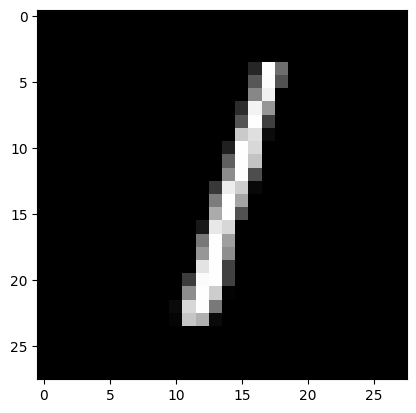

In [51]:
plt.imshow(X_test[2].reshape(28,28), cmap='grey')

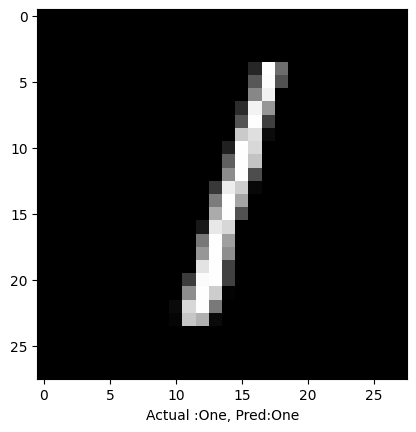

In [57]:
#Names of the numbers in dataset in order
col_names= ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
plt.imshow(X_test[2].reshape(28,28),cmap='grey')
plt.xlabel("Actual :{}, Pred:{}".format(col_names[y_test[2]],col_names[y_predicts_singles]))
plt.show()

In [54]:
y_test[2]

np.uint8(1)